In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Flatten, Dense, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

from utils import load_data, plot_data

<a id='index'></a>
# Index

- **[Data](#data)**
- **[Training the CNN model](#training)**
    - [History of training and validation loss](#loss_plot)
- **[Testing and visualising predictions](#testing)**

<a id='data'></a>
## Data
The data was taken from [Kaggle](https://www.kaggle.com/c/facial-keypoints-detection/data).

The training dataset contains several thousand  $96×96$  grayscale images of cropped human faces, along with each face's 15 corresponding facial keypoints (also called landmarks) that have been placed by hand, and recorded in  $(x,y)$  coordinates. 

In [3]:
X_train, y_train = load_data()
print("X_train.shape == {}".format(X_train.shape))
print("y_train.shape == {}; y_train.min == {:.3f}; y_train.max == {:.3f}".format(
    y_train.shape, y_train.min(), y_train.max()))

# Load testing set
X_test, _ = load_data(test=True)
print("\nX_test.shape == {}".format(X_test.shape))

X_train.shape == (2140, 96, 96, 1)
y_train.shape == (2140, 30); y_train.min == -0.920; y_train.max == 0.996

X_test.shape == (1783, 96, 96, 1)


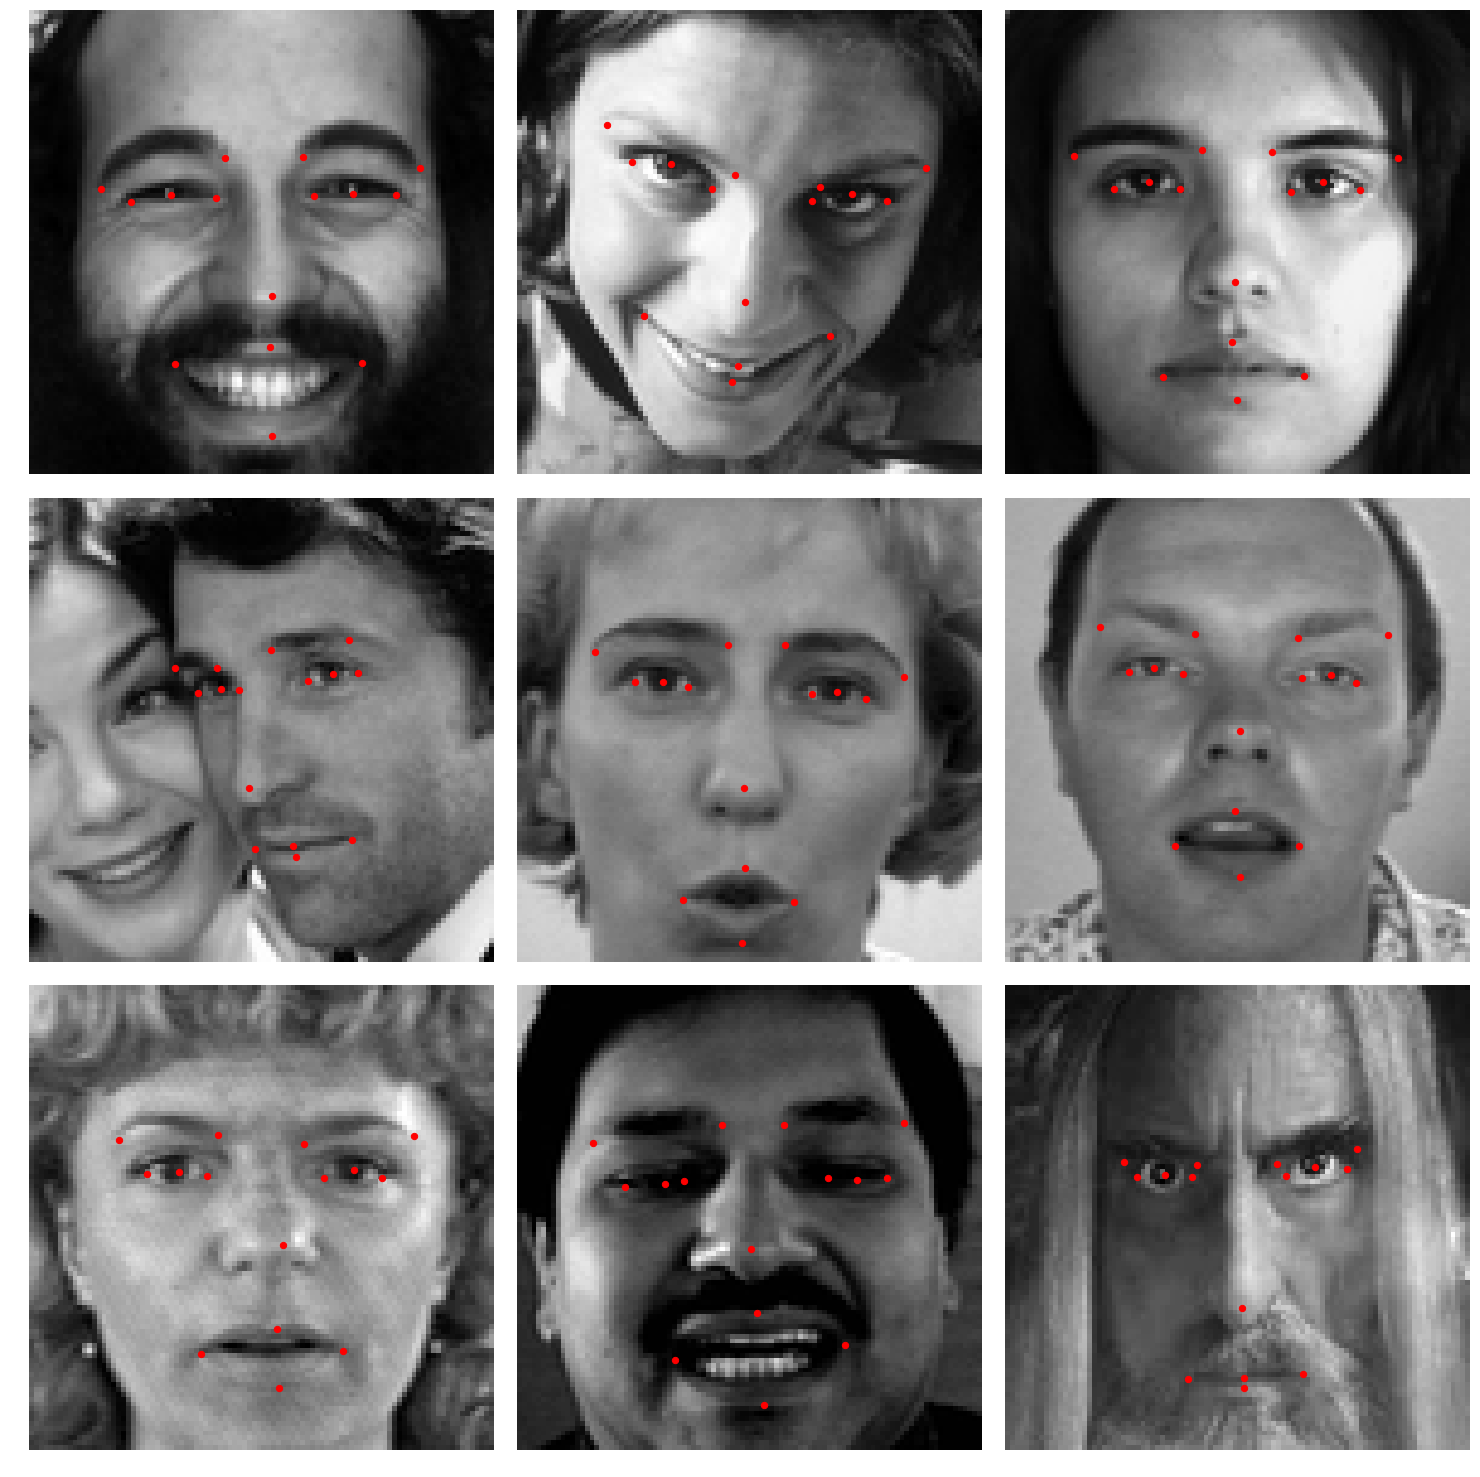

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(3):
    for j in range(3):
        plot_data(X_train[i*3 + j], y_train[i*3 + j], ax[i][j])
        ax[i][j].axis("off")

plt.show()

<a id='training'></a>
## Training the CNN model
[back to index](#index)

The number of layers and units was more or less chosen arbitrarily. However, it is worth noting that
- 3 convolutional layers are usually a good starting point for most simple computer vision tasks
- global average pooling layer has been reported to improve the learning process
- 2-3 dense layers are usually sufficient for most learning tasks
layers and units can always be added later if the model is suffering from high bias

In [7]:
model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=2,
                 input_shape=(96, 96, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64,
                 kernel_size=2))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))
model.add(Conv2D(filters=128,
                 kernel_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(64))
model.add(Dense(30))
model.add(Dense(30))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 95, 95, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       32896     
__________

In [8]:
model.compile(optimizer="Adam", loss="mse")

checkpointer = ModelCheckpoint(monitor='val_loss',
                               filepath='landmarks_detector.h5', 
                               verbose=1, 
                               save_best_only=True)
hist = model.fit(X_train, 
                 y_train,
                 validation_split=0.2,
                 epochs=500,
                 batch_size=32,
                 verbose=2,
                 callbacks=[checkpointer])

Train on 1712 samples, validate on 428 samples
Epoch 1/500
Epoch 00000: val_loss improved from inf to 0.00757, saving model to model.h5
3s - loss: 0.0257 - val_loss: 0.0076
Epoch 2/500
Epoch 00001: val_loss improved from 0.00757 to 0.00582, saving model to model.h5
1s - loss: 0.0051 - val_loss: 0.0058
Epoch 3/500
Epoch 00002: val_loss improved from 0.00582 to 0.00539, saving model to model.h5
1s - loss: 0.0046 - val_loss: 0.0054
Epoch 4/500
Epoch 00003: val_loss improved from 0.00539 to 0.00533, saving model to model.h5
1s - loss: 0.0045 - val_loss: 0.0053
Epoch 5/500
Epoch 00004: val_loss did not improve
1s - loss: 0.0046 - val_loss: 0.0054
Epoch 6/500
Epoch 00005: val_loss did not improve
1s - loss: 0.0045 - val_loss: 0.0057
Epoch 7/500
Epoch 00006: val_loss did not improve
1s - loss: 0.0046 - val_loss: 0.0054
Epoch 8/500
Epoch 00007: val_loss did not improve
1s - loss: 0.0047 - val_loss: 0.0056
Epoch 9/500
Epoch 00008: val_loss did not improve
1s - loss: 0.0047 - val_loss: 0.0053
Ep

Epoch 00082: val_loss did not improve
1s - loss: 0.0041 - val_loss: 0.0043
Epoch 84/500
Epoch 00083: val_loss did not improve
1s - loss: 0.0041 - val_loss: 0.0043
Epoch 85/500
Epoch 00084: val_loss did not improve
1s - loss: 0.0042 - val_loss: 0.0044
Epoch 86/500
Epoch 00085: val_loss did not improve
1s - loss: 0.0042 - val_loss: 0.0043
Epoch 87/500
Epoch 00086: val_loss improved from 0.00425 to 0.00415, saving model to model.h5
1s - loss: 0.0042 - val_loss: 0.0042
Epoch 88/500
Epoch 00087: val_loss did not improve
1s - loss: 0.0042 - val_loss: 0.0043
Epoch 89/500
Epoch 00088: val_loss improved from 0.00415 to 0.00415, saving model to model.h5
1s - loss: 0.0041 - val_loss: 0.0041
Epoch 90/500
Epoch 00089: val_loss did not improve
1s - loss: 0.0042 - val_loss: 0.0042
Epoch 91/500
Epoch 00090: val_loss did not improve
1s - loss: 0.0042 - val_loss: 0.0045
Epoch 92/500
Epoch 00091: val_loss did not improve
1s - loss: 0.0041 - val_loss: 0.0042
Epoch 93/500
Epoch 00092: val_loss did not impr

Epoch 00165: val_loss did not improve
1s - loss: 0.0035 - val_loss: 0.0037
Epoch 167/500
Epoch 00166: val_loss did not improve
1s - loss: 0.0035 - val_loss: 0.0036
Epoch 168/500
Epoch 00167: val_loss did not improve
1s - loss: 0.0035 - val_loss: 0.0039
Epoch 169/500
Epoch 00168: val_loss improved from 0.00348 to 0.00347, saving model to model.h5
1s - loss: 0.0035 - val_loss: 0.0035
Epoch 170/500
Epoch 00169: val_loss did not improve
1s - loss: 0.0035 - val_loss: 0.0035
Epoch 171/500
Epoch 00170: val_loss did not improve
1s - loss: 0.0035 - val_loss: 0.0035
Epoch 172/500
Epoch 00171: val_loss did not improve
1s - loss: 0.0035 - val_loss: 0.0035
Epoch 173/500
Epoch 00172: val_loss did not improve
1s - loss: 0.0035 - val_loss: 0.0036
Epoch 174/500
Epoch 00173: val_loss did not improve
1s - loss: 0.0035 - val_loss: 0.0036
Epoch 175/500
Epoch 00174: val_loss did not improve
1s - loss: 0.0036 - val_loss: 0.0037
Epoch 176/500
Epoch 00175: val_loss did not improve
1s - loss: 0.0035 - val_loss:

Epoch 00254: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0040
Epoch 256/500
Epoch 00255: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0035
Epoch 257/500
Epoch 00256: val_loss did not improve
1s - loss: 0.0032 - val_loss: 0.0036
Epoch 258/500
Epoch 00257: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0036
Epoch 259/500
Epoch 00258: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0034
Epoch 260/500
Epoch 00259: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0036
Epoch 261/500
Epoch 00260: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0036
Epoch 262/500
Epoch 00261: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0036
Epoch 263/500
Epoch 00262: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0034
Epoch 264/500
Epoch 00263: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0036
Epoch 265/500
Epoch 00264: val_loss did not improve
1s - loss: 0.0033 - val_loss: 0.0038
Epoch 266/500
Epoch 00265: val_loss

Epoch 00346: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0035
Epoch 348/500
Epoch 00347: val_loss did not improve
1s - loss: 0.0032 - val_loss: 0.0035
Epoch 349/500
Epoch 00348: val_loss did not improve
1s - loss: 0.0032 - val_loss: 0.0035
Epoch 350/500
Epoch 00349: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0036
Epoch 351/500
Epoch 00350: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0035
Epoch 352/500
Epoch 00351: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0035
Epoch 353/500
Epoch 00352: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0033
Epoch 354/500
Epoch 00353: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0036
Epoch 355/500
Epoch 00354: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0035
Epoch 356/500
Epoch 00355: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0033
Epoch 357/500
Epoch 00356: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0036
Epoch 358/500
Epoch 00357: val_loss

Epoch 00438: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0033
Epoch 440/500
Epoch 00439: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0036
Epoch 441/500
Epoch 00440: val_loss did not improve
1s - loss: 0.0031 - val_loss: 0.0039
Epoch 442/500
Epoch 00441: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0034
Epoch 443/500
Epoch 00442: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0033
Epoch 444/500
Epoch 00443: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0035
Epoch 445/500
Epoch 00444: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0035
Epoch 446/500
Epoch 00445: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0033
Epoch 447/500
Epoch 00446: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0034
Epoch 448/500
Epoch 00447: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0035
Epoch 449/500
Epoch 00448: val_loss did not improve
1s - loss: 0.0030 - val_loss: 0.0033
Epoch 450/500
Epoch 00449: val_loss

<a id='loss_plot'></a>
### History of training and validation loss
[back to index](#index)

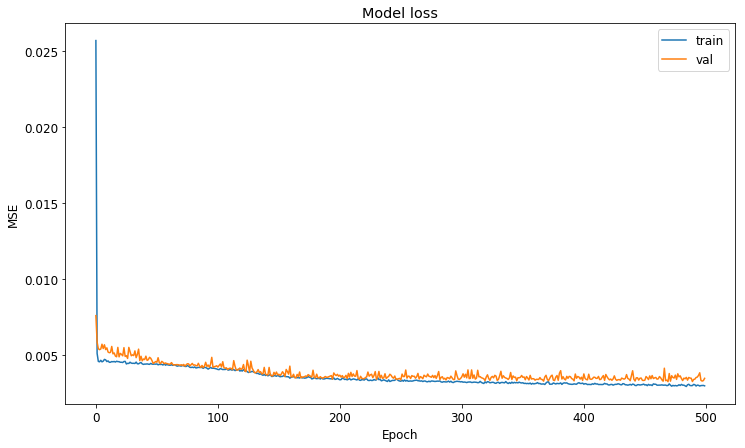

In [9]:
plt.rcParams["font.size"] = 12
fig = plt.figure(figsize=(12, 7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

<a id='testing'></a>
## Testing and visualing predictions
[back to index](#index)

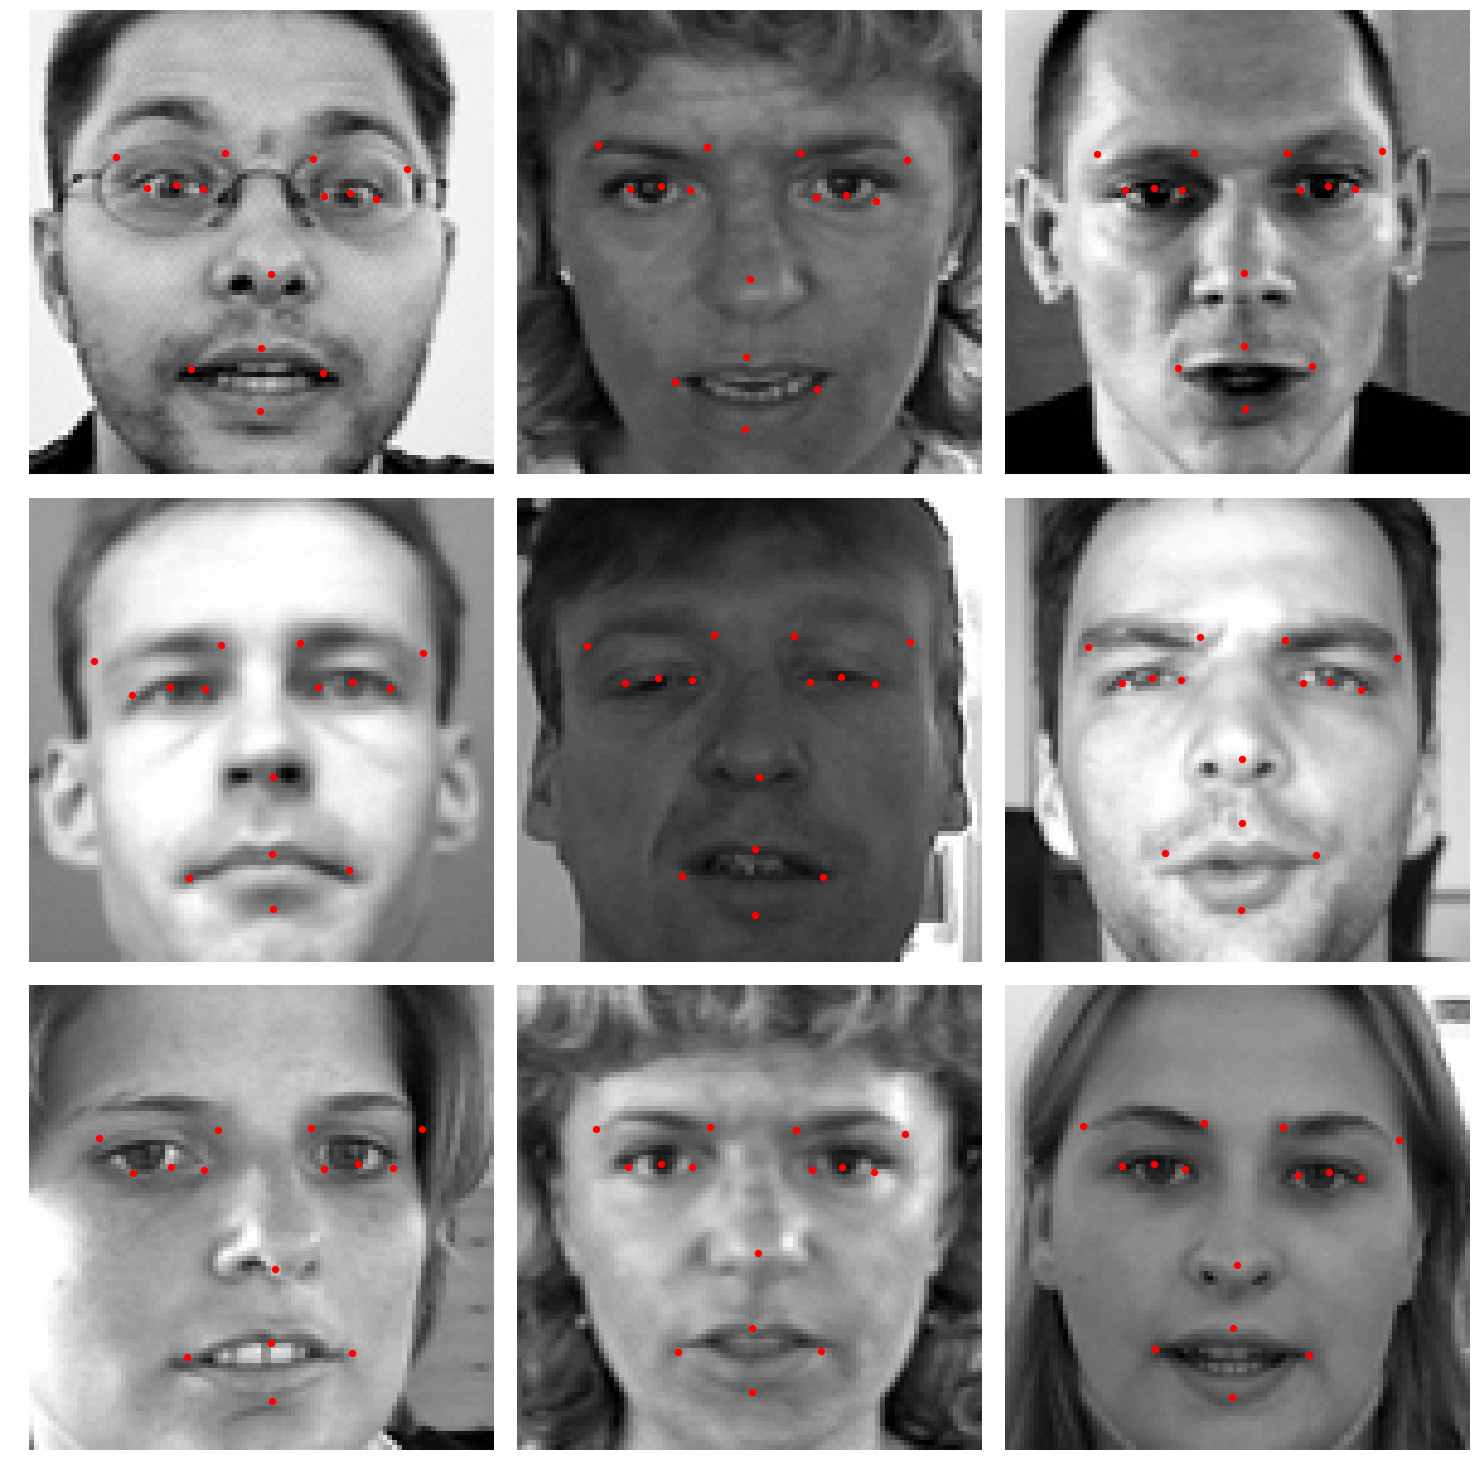

In [12]:
from keras.models import load_model

model = load_model("model.h5")
y_test = model.predict(X_test)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(3):
    for j in range(3):
        plot_data(X_test[i*3 + j], y_test[i*3 + j], ax[i][j]) 
        ax[i][j].axis("off")
        
plt.show()